2020년 코로나 데이터 시각화

# 임포트

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import date, timedelta

# 데이터 가져오기

In [2]:
!wget https://github.com/Chanmi-K/Python/raw/main/Data/covid_data.zip

--2022-07-02 06:03:24--  https://github.com/Chanmi-K/Python/raw/main/Data/covid_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/covid_data.zip [following]
--2022-07-02 06:03:24--  https://raw.githubusercontent.com/Chanmi-K/Python/main/Data/covid_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7495155 (7.1M) [application/zip]
Saving to: ‘covid_data.zip’

covid_data.zip      100%[===================>]   7.15M  --.-KB/s    in 0.09s   

2022-07-02 06:03:25 (83.2 MB/s) - ‘covid_data.zip’ saved [7495155/7495155]



In [5]:
!unzip covid_data.zip

Archive:  covid_data.zip
  inflating: covid_data/Case.csv     
  inflating: covid_data/PatientInfo.csv  
  inflating: covid_data/Policy.csv   
  inflating: covid_data/Region.csv   
  inflating: covid_data/SearchTrend.csv  
  inflating: covid_data/SeoulFloating.csv  
  inflating: covid_data/Time.csv     
  inflating: covid_data/TimeAge.csv  
  inflating: covid_data/TimeGender.csv  
  inflating: covid_data/TimeProvince.csv  
  inflating: covid_data/Weather.csv  


In [6]:
case = pd.read_csv('covid_data/Case.csv')
p_info = pd.read_csv('covid_data/PatientInfo.csv')
time = pd.read_csv('covid_data/Time.csv')
t_age = pd.read_csv('covid_data/TimeAge.csv')
t_gender = pd.read_csv('covid_data/TimeGender.csv')
t_provin = pd.read_csv('covid_data/TimeProvince.csv')
region = pd.read_csv('covid_data/Region.csv')
weather = pd.read_csv('covid_data/Weather.csv') # 여기서는 미사용
search = pd.read_csv('covid_data/SearchTrend.csv') # 여기서는 미사용
floating = pd.read_csv('covid_data/SeoulFloating.csv') # 여기서는 미사용
policy = pd.read_csv('covid_data/Policy.csv') # 여기서는 미사용

# CodeBook

각 데이터의 열 이름 보여주기

In [11]:
print(f'case : {case.columns.tolist()}')
print(f'p_info : {p_info.columns.tolist()}')
print(f'time : {time.columns.tolist()}')
print(f't_age : {t_age.columns.tolist()}')
print(f't_gender : {t_gender.columns.tolist()}')
print(f't_provin : {t_provin.columns.tolist()}')
print(f'region : {region.columns.tolist()}')

case : [' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed', 'latitude', 'longitude']
p_info : ['patient_id', 'sex', 'age', 'country', 'province', 'city', 'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date', 'confirmed_date', 'released_date', 'deceased_date', 'state']
time : ['date', 'time', 'test', 'negative', 'confirmed', 'released', 'deceased']
t_age : ['date', 'time', 'age', 'confirmed', 'deceased']
t_gender : ['date', 'time', 'sex', 'confirmed', 'deceased']
t_provin : ['date', 'time', 'province', 'confirmed', 'released', 'deceased']
region : ['code', 'province', 'city', 'latitude', 'longitude', 'elementary_school_count', 'kindergarten_count', 'university_count', 'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio', 'nursing_home_count']


# 데이터 살펴보기

In [16]:
case.head(3)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387


In [17]:
p_info.head(3)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released


In [18]:
time.head(3)

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0


In [19]:
t_age.head(3)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0


In [20]:
t_gender.head(3)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16


In [21]:
t_provin.head(3)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0


In [22]:
region.head(3)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023


# 일별 확진자와 누적 확진자 시각화

첫 확진자가 발생한 날부터 현재 데이터상 존재하는 가장 최근 날짜까지 코로나 확진자 발생 추이를 그래프로 나타내보자

확진자 데이터 : p_info

In [24]:
#데이터프레임 크기 확인
p_info.shape

(5165, 14)

In [25]:
p_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [26]:
#데이터 프레임 정보 확인
p_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


non-null 데이터 수를 보아 일부 열에 NULL 값이 있는 것을 알 수 있다.

In [27]:
#확진 날짜 별 환자 카운트
daily_count = p_info.groupby('confirmed_date').patient_id.count()
daily_count

confirmed_date
2020-01-20     1
2020-01-23     1
2020-01-26     1
2020-01-27     1
2020-01-30     4
              ..
2020-06-26    40
2020-06-27    48
2020-06-28    38
2020-06-29    25
2020-06-30     7
Name: patient_id, Length: 148, dtype: int64

2020년 1월 20일부터 2020년 6월 30일까지의 데이터가 존재

In [28]:
type(daily_count)

pandas.core.series.Series

In [29]:
daily_count.index

Index(['2020-01-20', '2020-01-23', '2020-01-26', '2020-01-27', '2020-01-30',
       '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-05',
       ...
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
       '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30'],
      dtype='object', name='confirmed_date', length=148)

In [30]:
daily_count.values

array([  1,   1,   1,   1,   4,   3,   1,   3,   1,   5,   2,   1,   3,
         1,   2,   9,  28,  42,  37,  72,  75,  57,  93, 122, 112, 137,
       103, 133,  68, 113, 116, 145,  99,  57,  54,  69,  95,  51,  35,
        35,  34,  37,  53,  44,  57,  50,  73,  38,  31,  23,  57,  47,
        49,  49,  67,  55,  46,  78,  48,  59,  48,  43,  27,  22,  34,
        24,  23,  16,  12,  18,  17,  20,  14,  11,  13,   5,   7,   6,
        10,   7,   5,   8,   9,   5,  10,   6,   1,   4,   4,   9,   3,
         2,   3,   8,  22,  30,  27,  28,  21,  29,  24,  10,  10,   7,
        14,  27,  15,  11,  22,  20,  17,  14,  37,  77,  57,  37,  23,
        32,  46,  44,  33,  39,  53,  52,  28,  38,  50,  38,  44,  49,
        38,  25,  24,  40,  50,  42,  52,  41,  20,  15,  38,  25,  33,
        40,  48,  38,  25,   7])

In [31]:
#누적 확진자 계산
accumulated_count = daily_count.cumsum()
accumulated_count

confirmed_date
2020-01-20       1
2020-01-23       2
2020-01-26       3
2020-01-27       4
2020-01-30       8
              ... 
2020-06-26    5044
2020-06-27    5092
2020-06-28    5130
2020-06-29    5155
2020-06-30    5162
Name: patient_id, Length: 148, dtype: int64

## Series.plot

Text(0.5, 1.0, 'Number of Daily Confirmed Patients')

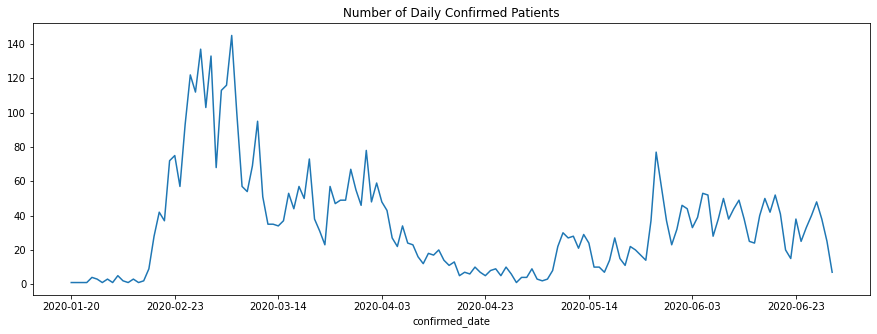

In [32]:
#시리즈 시각화
plt.figure(figsize=(15,5))
daily_count.plot()
plt.title('Number of Daily Confirmed Patients')

Text(0.5, 1.0, 'Accumulated Number of Daily Confirmed Patients')

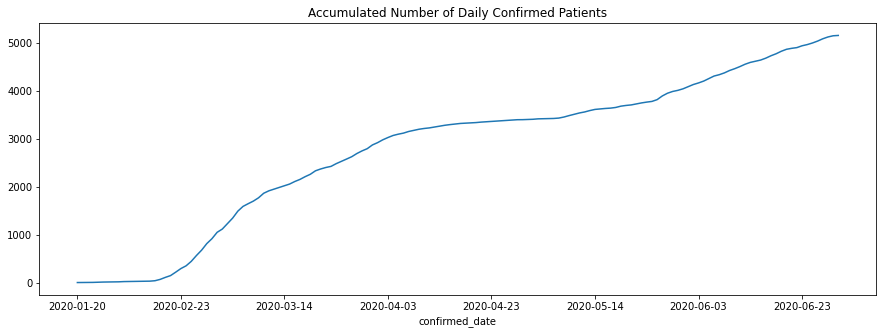

In [33]:
#누적 확진자 수 그래프
plt.figure(figsize=(15,5))
accumulated_count.plot()
plt.title('Accumulated Number of Daily Confirmed Patients')

# 성별에 따른 확진자 통계 나타내기

성별에 따른 확진자 통계를 바 차트로 나타내기

In [34]:
p_info['sex']

0         male
1         male
2         male
3         male
4       female
         ...  
5160    female
5161       NaN
5162       NaN
5163       NaN
5164       NaN
Name: sex, Length: 5165, dtype: object

In [35]:
#결측값 제외 카운트
p_info['sex'].value_counts()

female    2218
male      1825
Name: sex, dtype: int64

## sns.countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


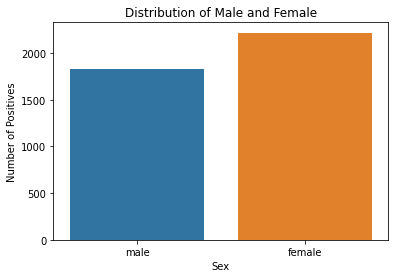

In [36]:
sns.countplot(p_info['sex'])
plt.title('Distribution of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Number of Positives')
plt.show()

# 감염 원인 통계 시각화

감염 원인 : p_info['infection_case']

바 차트로 시각화

In [38]:
#감염 원인
p_info.infection_case.unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Biblical Language study meeting',
       'Coupang Logistics Center', 'Guri Collective Infection',
       'KB Life Insurance', 'Gangnam Dongin Church',
       'Korea Campus Crusade of Christ',
       'Yeongdeungpo Learning Institute', 'Yeonana News Class',
       'SMR Newly Planted Churches Group', 'Seocho Family',
       'Anyang Gunpo Pastors Group', 'Richway',
       'Samsung Fire & Marine Insurance', 'Yangcheon Table Tennis Club',
       'Yongin Brothers', 'Day Care Center',
       'Geumcheon-gu rice milling machine manufacture', 'Daezayeon Korea',
       'Orange Life', 'Daejeon door-to-door sales',
       'Seoul City Hall Station safety worker', 'Uiwang Logistics Center',
       'Wangsung Church', 'Gangnam Yeoksam-dong gathering',
       'Onchun

In [55]:
p_info.groupby('infection_case')['patient_id'].count().sort_values(ascending=False)

infection_case
contact with patient                             1610
overseas inflow                                   840
etc                                               703
Itaewon Clubs                                     162
Richway                                           128
Guro-gu Call Center                               112
Shincheonji Church                                107
Coupang Logistics Center                           80
Yangcheon Table Tennis Club                        44
Day Care Center                                    43
SMR Newly Planted Churches Group                   36
Onchun Church                                      33
Bonghwa Pureun Nursing Home                        31
gym facility in Cheonan                            30
Ministry of Oceans and Fisheries                   28
Wangsung Church                                    24
Cheongdo Daenam Hospital                           21
Dongan Church                                      17
Eunpyeong St.

## sns.countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


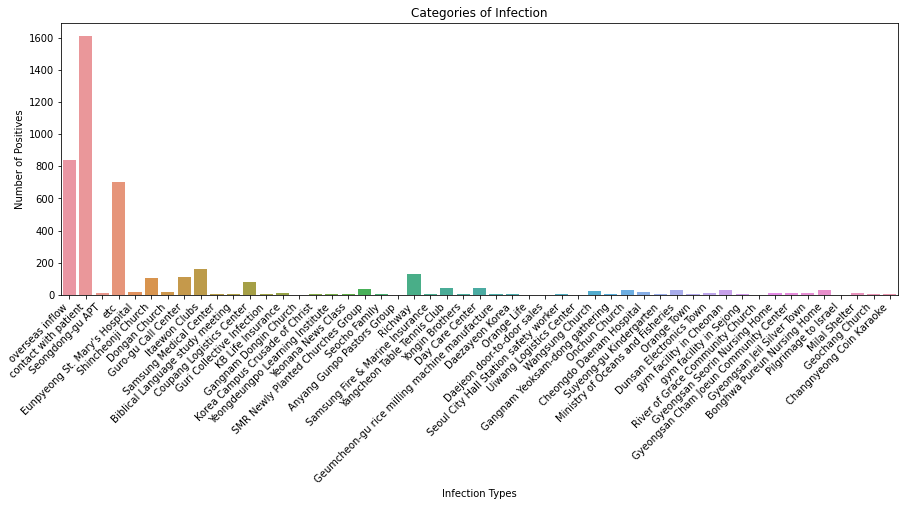

In [56]:
plt.figure(figsize=(15,5))
ax = sns.countplot(p_info['infection_case'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Categories of Infection')
plt.xlabel('Infection Types')
plt.ylabel('Number of Positives')
plt.show()

# 시도별 확진자 통계 시각화

시도별 : p_info['province']

바 차트로 시각화

In [61]:
p_info['province'].unique().tolist()

['Seoul',
 'Busan',
 'Daegu',
 'Gwangju',
 'Incheon',
 'Daejeon',
 'Gyeonggi-do',
 'Sejong',
 'Ulsan',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']

## sns.countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


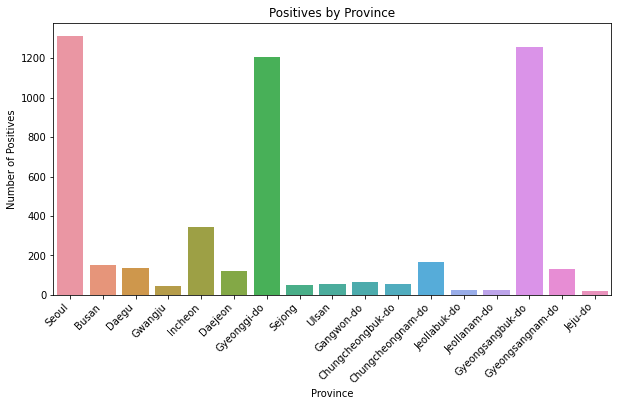

In [63]:
plt.figure(figsize=(10,5))
ax = sns.countplot(p_info['province'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Positives by Province')
plt.xlabel('Province')
plt.ylabel('Number of Positives')
plt.show()

# 주요 도시별 확진자 비율

각 도시별 확진자수 정보 : case

In [64]:
case.head(3)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387


In [65]:
#대구시로 필터링
case[case['province']=='Daegu']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
48,1200001,Daegu,Nam-gu,True,Shincheonji Church,4511,35.84008,128.5667
49,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,196,35.857375,128.466651
50,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,124,35.885592,128.556649
51,1200004,Daegu,Dalseong-gun,True,Daesil Convalescent Hospital,101,35.857393,128.466653
52,1200005,Daegu,Dong-gu,True,Fatima Hospital,39,35.88395,128.624059
53,1200006,Daegu,from other city,True,Itaewon Clubs,2,-,-
54,1200007,Daegu,from other city,True,Cheongdo Daenam Hospital,2,-,-
55,1200008,Daegu,-,False,overseas inflow,41,-,-
56,1200009,Daegu,-,False,contact with patient,917,-,-
57,1200010,Daegu,-,False,etc,747,-,-


## sns.barplot1

provine가 대구인 바차트

[Text(0, 0.5, 'Districts'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Case in Daegu')]

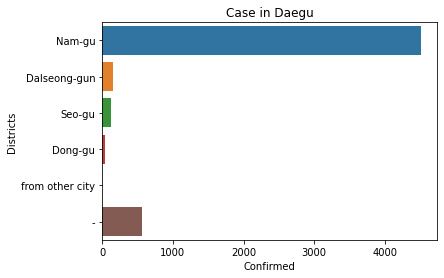

In [66]:
sns.barplot(x='confirmed', y='city', data=case[case['province']=='Daegu'], ci=None).set(xlabel='Confirmed', ylabel='Districts', title='Case in Daegu')

## sns.barplot2

감염 원인이 신천지 교회인 경우 바차트

[Text(0, 0.5, 'Districts'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Shincheonji Church')]

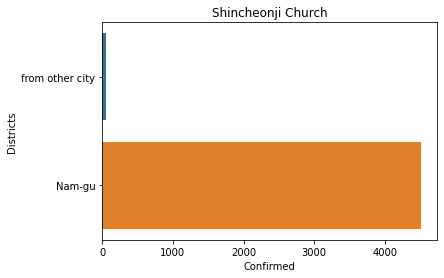

In [68]:
#감염 원인이 신천지 교회인 데이터만 시각화
sns.barplot(x='confirmed', y='city', data=case[case['infection_case']=='Shincheonji Church'], ci=None).set(xlabel='Confirmed', ylabel='Districts', title='Shincheonji Church')

## sns.barplot sum

감염원인이 신천지 교회인 경우의 합계 바 차트

[Text(0, 0.5, 'Districts'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Shincheonji Church')]

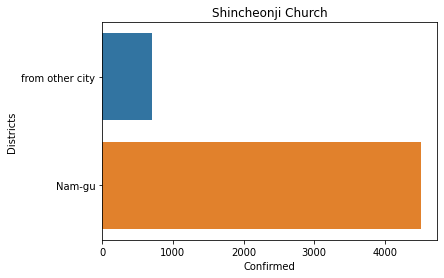

In [70]:
#합계에 대한 바 차트
sns.barplot(x='confirmed', y='city', data=case[case['infection_case']=='Shincheonji Church'], ci=None, estimator=sum).set(xlabel='Confirmed', ylabel='Districts', title='Shincheonji Church')

## sns.barplot3

서울시의 확진자 바차트

[Text(0, 0.5, 'Districts'),
 Text(0.5, 0, 'Confirmed'),
 Text(0.5, 1.0, 'Case in Seoul')]

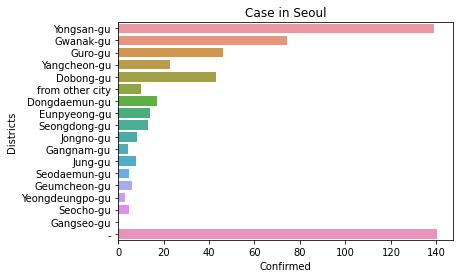

In [71]:
sns.barplot(x='confirmed', y='city', data=case[case['province']=='Seoul'], ci=None).set(xlabel='Confirmed', ylabel='Districts', title='Case in Seoul')

# 성별과 연령대별 확진자 통계

성별과 연령대 별 확진자 통계를 파이 차트를 통해 시각화

t_gender 데이터 프레임에 날짜별 여성과 남성 누적 확진자 수가 기록되어 있다.

t_age 데이터 프레임에 연령대별 누적 확진자 수가 기록되어 있다.

먼저, 성별 파이 차트

In [72]:
#마지막 날짜 확인
t_gender.tail(3)

,date,time,sex,confirmed,deceased
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151
241,2020-06-30,0,female,7305,131


In [74]:
#필요한 데이터 마지막 두 데이터
pie_values = t_gender[t_gender.date=='2020-06-30'].confirmed.values.tolist()
pie_labels = ['male','female']
print(pie_values)
print(pie_labels)

[5495, 7305]
['male', 'female']


## plt.pie 성별

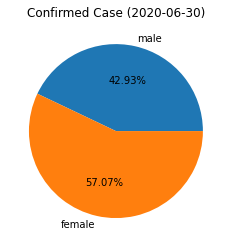

In [75]:
plt.pie(pie_values, labels=pie_labels, autopct='%.02f%%')
plt.title('Confirmed Case (2020-06-30)')
plt.show()

다음, 연령대별 파이 차트

In [77]:
age_data = t_age[t_age['date']=='2020-06-30']
pie_values = age_data.confirmed.values.tolist()
pie_labels = age_data.age.values.tolist()
print(pie_values)
print(pie_labels)

[193, 708, 3362, 1496, 1681, 2286, 1668, 850, 556]
['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s']


## plt.pie 연령대별

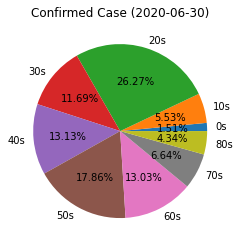

In [78]:
plt.pie(pie_values, labels=pie_labels, autopct='%.02f%%')
plt.title('Confirmed Case (2020-06-30)')
plt.show()